In [1]:
import os
import shutil
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline
BASE_ROOT = os.getcwd()
PLOT_DATA_TIMESERIES = os.path.join(BASE_ROOT, 'PLOT_DATA')

In [209]:
path_root = os.path.dirname(os.path.abspath('')) # get path root folder
path_dataset = os.path.join(path_root, 'dataset', 'dataset.xlsx')

In [4]:
def load_sensor_data(path):
    return pd.read_excel(path, skiprows = range(0, 2))

In [5]:
data = load_sensor_data(path=path_dataset)

In [6]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,データＩＤ,Time,L-FX,L-FY,L-FZ,R-FX,R-FY,...,R-Fz3,R-Mx3,R-My3,R-Mz3,R-AccelX,R-AccelY,R-AccelZ,R-GyroX,R-GyroY,R-GyroZ
0,9th,26500003,NaN,A1-M1,5.26,0.0,0.0,0.0,11.28,-53.86,...,230.897959,-73.408163,18.795918,59.755102,0.02,0.07,0.97,0.91,-3.08,-3.29
1,9th,26500003,NaN,A1-M1,5.28,0.0,0.0,0.0,6.73,-53.19,...,215.897959,-69.408163,18.795918,57.755102,0.02,0.08,0.98,0.91,-3.01,-3.29
2,9th,26500003,NaN,A1-M1,5.30,0.0,0.0,0.0,2.14,-51.21,...,203.897959,-71.408163,18.795918,56.755102,0.02,0.08,0.98,1.19,-3.08,-3.43
3,9th,26500003,NaN,A1-M1,5.32,0.0,0.0,0.0,-5.64,-51.51,...,184.897959,-64.408163,18.795918,46.755102,0.02,0.08,0.98,1.75,-2.87,-3.36
4,9th,26500003,NaN,A1-M1,5.34,0.0,0.0,0.0,-6.16,-51.57,...,167.897959,-61.408163,13.795918,40.755102,0.02,0.08,0.98,1.75,-2.59,-3.50


In [9]:
# Processing name 
data_copy = data.copy()
data_copy.rename(columns={'Unnamed: 0': 'datecheck-ID', 
                          'Unnamed: 1': 'shoes-ID',
                          'Unnamed: 2': 'balance-status',
                          'データＩＤ':'set-ID',
                         }, inplace = True)

# convert column object to string
data_copy['shoes-ID'] = data_copy['shoes-ID'].apply(str)

In [11]:
# Some information we get it data 
print('The set of data is %s' % (len(data_copy['set-ID'].unique())))
print('The amount of shoes used to collect data %s' % (len(data_copy['shoes-ID'].unique())))

The set of data is 412
The amount of shoes used to collect data 15


In [204]:
list_shoesid = data_copy['shoes-ID'].unique()
list_samples = data_copy['set-ID'].unique()
list_balancestatus = data_copy['balance-status'].unique()
list_attributes_output = ['L-FX', 'L-FY', 'L-FZ', 'R-FX', 'R-FY', 'R-FZ']
list_attributes_skip = ['datecheck-ID', 'shoes-ID', 'balance-status', 'set-ID', 'Time']

list_attributes_input = data_copy.columns.values.tolist()
for name in list_attributes_output:
    list_attributes_input.remove(name)
    
for name in list_attributes_skip:
    list_attributes_input.remove(name)

In [27]:
print(list_shoesid)
print(list_samples)
print(list_balancestatus)

['26500003' '26500004' '23500001' '23500002' '26000003' '25500001'
 '23500001NG' '26500001NG' '26500002NG' '27000001' '27500001' '24000001'
 '22500003' '25000001' '25500003']
['A1-M1' 'A1-M2' 'A2-M1' 'A2-M2' 'A4-M1' 'A4-M2' 'A6-M2' 'A6-M3' 'C1-M1'
 'C2-M1' 'A6-M1' 'A6-M4' 'A6-M5' 'A7-M1' 'A7-M2' 'A8-M1' 'A8-M2' 'A2-M3'
 'C2-M2' 'A1-T1' 'A1-T2' 'A2-T1' 'A2-T2' 'A4-T1' 'A4-T2' 'A6-T1' 'A6-T2'
 'A6-T3' 'A6-T4' 'A6-T5' 'A7-T1' 'A7-T2' 'A8-T1' 'A8-T2' 'C1-T1' 'C1-T2'
 'C2-T2' 'A1-K1' 'A1-K2' 'A2-K1' 'A2-K2' 'A4-K1' 'A4-K2' 'A6-K1' 'A6-K2'
 'A6-K3' 'A6-K4' 'A6-K5' 'A7-K1' 'A8-K1' 'A8-K2' 'C1-K1' 'C1-K2' 'A6-K6'
 'A6-K7' 'A6-K8' 'A6-K9' 'A6-K10' 'A7-K2' 'C2-K1' 'A1-SES1' 'A1-SES2'
 'A2-SES1' 'A2-SES2' 'A4-SES1' 'A4-SES2' 'A6-SES1' 'A6-SES2' 'A6-SES3'
 'A6-SES4' 'A6-SES5' 'A8-SES1' 'A8-SES2' 'C1-SES1' 'C2-SES1' 'A1-SEW1'
 'A2-SEW1' 'A2-SEW2' 'A4-SEW1' 'A6-SEW1' 'A6-SEW2' 'A6-SEW3' 'A6-SEW4'
 'A6-SEW5' 'A8-SEW1' 'A8-SEW2' 'A1-SEW2' 'A4-SEW2' 'C1-SEW1' 'C2-SEW1'
 'A1-NA1' 'A1-NA2' 'A2-NA1' 'A2-N

In [15]:
# assume shoes-ID: 26500003
data_reflect = data_copy.loc[(data_copy['shoes-ID'].isin(list_shoesid)) & (data_copy['balance-status'] == 'M')] # all data reflect 
data_nonereflect = data_copy.loc[data_copy.index.difference(data_reflect.index)] # get a rest of the dataset

In [19]:
print(data_copy['balance-status'].unique())
print(data_reflect['balance-status'].unique())
print(data_nonereflect['balance-status'].unique())

# Length 
print('the amount of non reflect is %s - the amount of reflect is %s' % (len(data_nonereflect), len(data_reflect)))
print('Total data length is %s' % (len(data_copy)))

[nan 'M']
['M']
[nan]
the amount of non reflect is 118194 - the amount of reflect is 118194
Total data length is 236388


In [228]:
# we need sorted by time 
def check_folder_exists_byplot(pathfolder):
    if os.path.exists(pathfolder):
        shutil.rmtree(pathfolder)
    else:
        os.makedirs(pathfolder)
        
def sort_dataframe_bycolumns(dataframe, columns=['Time']):
    dataframe = dataframe.sort_values(by=columns)
    return dataframe

def plot_sample_output(df, path_save):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10)) # x: 20, y: 10
    df.plot(kind="line", x="Time", y="L-FX", ax=axes[0,0])
    df.plot(kind="line", x="Time", y="L-FY", ax=axes[0,1])
    df.plot(kind="line", x="Time", y="L-FZ", ax=axes[0,2])

    df.plot(kind="line", x="Time", y="R-FX", ax=axes[1,0], color='g')
    df.plot(kind="line", x="Time", y="R-FY", ax=axes[1,1], color='g')
    df.plot(kind="line", x="Time", y="R-FZ", ax=axes[1,2], color='g')
    plt.savefig(path_save)
    plt.close()
    
def plot_sample_input(df, path_save):
    rgb = np.random.rand(3,)
    fig, axes = plt.subplots(nrows=16, ncols=3, figsize=(25,50))
    
    axis_count = -1
    for index, name_att in enumerate(list_attributes_input):
        if index % 3 == 0:
            axis_count += 1
            r = np.random.random()
            b = np.random.random()
            g = np.random.random()
            color = (r, g, b)            
        df.plot(kind="line", x="Time", y=name_att, ax=axes[axis_count, index % 3], color=color)
        
    plt.savefig(path_save)
    plt.close()



def plot_sample(name_sample, df, folder_idsample):
    folder_idsample_input = os.path.join(folder_idsample, 'input')
    folder_idsample_output = os.path.join(folder_idsample, 'output')
    check_folder_exists_byplot(folder_idsample_input)
    check_folder_exists_byplot(folder_idsample_output)
    
    df_sorted = sort_dataframe_bycolumns(df, columns=['Time'])
    
    plot_sample_output(df=df_sorted, path_save=os.path.join(folder_idsample_output, '%s_output.jpg' % (name_sample)))
    plot_sample_input(df=df_sorted, path_save=os.path.join(folder_idsample_input, '%s_input.jpg' % (name_sample)))

In [229]:
# Visualization
"""
    Input: data_reflect
"""

for shoes_id in tqdm(list_shoesid):
    folder_byshoes = os.path.join(PLOT_DATA_TIMESERIES, str(shoes_id))
    check_folder_exists_byplot(folder_byshoes)
    for id_sample in list_samples:
        df_sample_bycondition = data_reflect.loc[(data_reflect['set-ID'] == id_sample) & (data_reflect['shoes-ID'] == shoes_id)]
        if len(df_sample_bycondition) == 0:
            continue
            
        # settings path 
        folder_idsample = os.path.join(folder_byshoes, str(id_sample))
        
        # check and create folder saving 
        check_folder_exists_byplot(folder_idsample)
        
        # processing 
        plot_sample(name_sample=id_sample, df=df_sample_bycondition, folder_idsample=folder_idsample)

100%|██████████| 15/15 [2:52:46<00:00, 691.13s/it]  


In [ ]:
data_copy.head()

In [ ]:
# -------------------------

In [32]:
def sort_bytime(df):
    df = df.sort_values(by=['Time'])
    return df

def drop_column(df):
    x = [0, 1, 2, 3] # 4: time 
    df_droped = df.drop(df.columns[x], axis=1)
    df_sorted = sort_bytime(df_droped)
    return df_sorted

data_Droped = drop_column(data)
data_Droped.head(20)

,Time,L-FX,L-FY,L-FZ,R-FX,R-FY,R-FZ,L-Fx1,L-Fy1,L-Fz1,...,R-Fz3,R-Mx3,R-My3,R-Mz3,R-AccelX,R-AccelY,R-AccelZ,R-GyroX,R-GyroY,R-GyroZ
114669,1.00,0.0,0.00,0.0,-13.29,-41.77,555.89,-0.920000,-2.980000,3.300000,...,557.607843,21.803922,83.058824,212.647059,0.09,0.10,0.99,1.54,10.36,-2.31
118264,1.00,0.0,41.77,0.0,0.00,0.00,0.00,46.431373,-12.509804,52.019608,...,11.740000,-5.180000,9.340000,-13.760000,0.92,-1.57,0.59,-330.61,-106.68,105.07
114670,1.02,0.0,0.00,0.0,-14.60,-43.71,515.98,0.080000,-0.980000,4.300000,...,483.607843,10.803922,77.058824,182.647059,0.08,0.10,0.98,2.52,13.44,-1.68
118265,1.02,0.0,43.71,0.0,0.00,0.00,0.00,69.431373,-14.509804,75.019608,...,11.740000,-5.180000,7.340000,-6.760000,0.24,-1.02,0.59,-349.44,-152.32,121.59
114671,1.04,0.0,0.00,0.0,-11.43,-34.48,476.23,-0.920000,1.020000,3.300000,...,415.607843,0.803922,79.058824,161.647059,0.06,0.10,0.96,3.08,13.86,-1.40
118266,1.04,0.0,34.48,0.0,0.00,0.00,0.00,87.431373,-14.509804,107.019608,...,9.740000,-6.180000,8.340000,-9.760000,-0.04,-0.26,0.92,-382.27,-87.92,79.31
114672,1.06,0.0,0.00,0.0,-6.72,-30.09,455.24,0.080000,-0.980000,8.300000,...,359.607843,-4.196078,76.058824,127.647059,0.06,0.10,0.97,4.69,13.02,-0.84
118267,1.06,0.0,30.09,0.0,0.00,0.00,0.00,104.431373,-11.509804,157.019608,...,11.740000,-8.180000,8.340000,-0.760000,-0.10,0.78,1.20,-355.74,-71.96,72.94
114673,1.08,0.0,0.00,0.0,1.81,-22.23,461.09,-0.920000,-1.980000,7.300000,...,293.607843,-12.196078,72.058824,110.647059,0.07,0.11,0.97,8.68,11.62,-1.40
114338,1.08,0.0,0.00,0.0,29.64,-25.02,593.54,0.080000,-4.980000,-0.700000,...,567.607843,14.803922,42.058824,215.647059,0.06,0.12,0.98,2.03,7.21,-0.14


In [8]:
data_Droped.describe()

,Time,L-FX,L-FY,L-FZ,R-FX,R-FY,R-FZ,L-Fx1,L-Fy1,L-Fz1,...,R-Fz3,R-Mx3,R-My3,R-Mz3,R-AccelX,R-AccelY,R-AccelZ,R-GyroX,R-GyroY,R-GyroZ
count,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,...,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000
mean,7.513083,-1.418075,22.114680,298.793611,-1.300807,-22.114680,302.957281,62.012641,25.433141,138.041484,...,167.814836,-49.059797,4.437006,-0.411473,-0.011716,0.205985,1.023005,-5.576232,-3.760600,0.407934
std,2.957011,30.683384,35.378709,282.987488,28.530326,35.378709,282.964398,108.512381,93.233803,224.987411,...,246.634563,71.264729,37.332834,81.267939,0.296547,0.644761,0.530022,112.689013,46.868387,38.868049
min,1.000000,-272.500000,-152.750000,-11.820000,-272.500000,-548.470000,-11.820000,-706.551020,-1369.960000,-623.895833,...,-58.265306,-682.270833,-265.860000,-695.740000,-15.370000,-9.780000,-8.760000,-753.410000,-647.800000,-459.400000
25%,5.180000,-4.910000,0.000000,0.000000,-4.820000,-38.650000,0.000000,0.080000,-4.020000,5.877551,...,-0.204082,-85.560000,-4.520833,-22.666667,-0.030000,0.050000,0.950000,-6.300000,-8.960000,-5.600000
50%,7.040000,0.000000,6.430000,273.370000,0.000000,-6.430000,291.465000,18.660000,5.469388,47.642917,...,29.777755,-12.940000,0.081633,-0.940000,0.010000,0.070000,0.980000,0.700000,-0.910000,-0.100000
75%,9.440000,3.340000,38.650000,550.910000,3.860000,0.000000,551.970000,91.940000,33.780000,178.489796,...,278.944082,0.300000,6.653061,17.120000,0.060000,0.250000,1.030000,7.560000,6.400000,5.200000
max,22.180000,430.640000,548.470000,1758.640000,430.640000,152.750000,1758.640000,2023.770833,1731.591837,2056.081633,...,2036.541667,850.638298,860.520833,974.895833,7.730000,15.980000,15.410000,720.020000,790.700000,426.300000


In [20]:
import numpy as np
np.argmin(data_Droped['Time'])

114669

In [25]:
data_Droped.iloc[0]

Time          5.260000
L-FX          0.000000
L-FY          0.000000
L-FZ          0.000000
R-FX         11.280000
R-FY        -53.860000
R-FZ        575.760000
L-Fx1         5.568627
L-Fy1         4.549020
L-Fz1         2.823529
L-Mx1        -0.235294
L-My1         0.274510
L-Mz1        -2.686275
L-Fx2         0.823529
L-Fy2        -0.941176
L-Fz2         0.568627
L-Mx2        -2.156863
L-My2         2.176471
L-Mz2       -18.941176
L-Fx3        -1.607843
L-Fy3        -0.627451
L-Fz3         2.176471
L-Mx3        -2.352941
L-My3         1.294118
L-Mz3         3.078431
L-AccelX     -0.060000
L-AccelY     -0.500000
L-AccelZ      0.580000
L-GyroX    -104.230000
L-GyroY      39.200000
L-GyroZ      10.360000
R-Fx1        26.836735
R-Fy1        14.408163
R-Fz1        84.877551
R-Mx1      -105.897959
R-My1         1.959184
R-Mz1         0.591837
R-Fx2       -84.081633
R-Fy2        81.326531
R-Fz2       124.693878
R-Mx2       -98.510204
R-My2       -21.653061
R-Mz2       -16.244898
R-Fx3      

In [9]:
data_Droped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236388 entries, 0 to 236387
Data columns (total 55 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Time      236388 non-null  float64
 1   L-FX      236388 non-null  float64
 2   L-FY      236388 non-null  float64
 3   L-FZ      236388 non-null  float64
 4   R-FX      236388 non-null  float64
 5   R-FY      236388 non-null  float64
 6   R-FZ      236388 non-null  float64
 7   L-Fx1     236388 non-null  float64
 8   L-Fy1     236388 non-null  float64
 9   L-Fz1     236388 non-null  float64
 10  L-Mx1     236388 non-null  float64
 11  L-My1     236388 non-null  float64
 12  L-Mz1     236388 non-null  float64
 13  L-Fx2     236388 non-null  float64
 14  L-Fy2     236388 non-null  float64
 15  L-Fz2     236388 non-null  float64
 16  L-Mx2     236388 non-null  float64
 17  L-My2     236388 non-null  float64
 18  L-Mz2     236388 non-null  float64
 19  L-Fx3     236388 non-null  float64
 20  L-Fy

In [10]:
data_Droped.columns

Index(['Time', 'L-FX', 'L-FY', 'L-FZ', 'R-FX', 'R-FY', 'R-FZ', 'L-Fx1',
       'L-Fy1', 'L-Fz1', 'L-Mx1', 'L-My1', 'L-Mz1', 'L-Fx2', 'L-Fy2', 'L-Fz2',
       'L-Mx2', 'L-My2', 'L-Mz2', 'L-Fx3', 'L-Fy3', 'L-Fz3', 'L-Mx3', 'L-My3',
       'L-Mz3', 'L-AccelX', 'L-AccelY', 'L-AccelZ', 'L-GyroX', 'L-GyroY',
       'L-GyroZ', 'R-Fx1', 'R-Fy1', 'R-Fz1', 'R-Mx1', 'R-My1', 'R-Mz1',
       'R-Fx2', 'R-Fy2', 'R-Fz2', 'R-Mx2', 'R-My2', 'R-Mz2', 'R-Fx3', 'R-Fy3',
       'R-Fz3', 'R-Mx3', 'R-My3', 'R-Mz3', 'R-AccelX', 'R-AccelY', 'R-AccelZ',
       'R-GyroX', 'R-GyroY', 'R-GyroZ'],
      dtype='object')

In [11]:
# showing plot
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Time'>

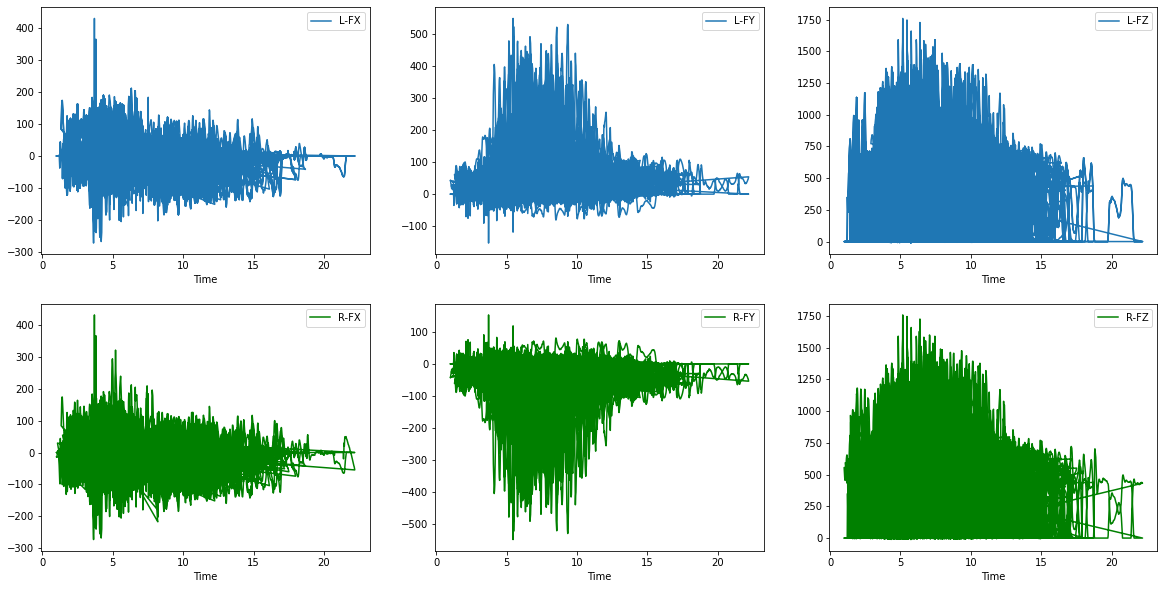

In [16]:
# visualize output 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10)) # 20: dai 5: cao
data_Droped.plot(kind="line", x="Time", y="L-FX", ax=axes[0,0])
data_Droped.plot(kind="line", x="Time", y="L-FY", ax=axes[0,1])
data_Droped.plot(kind="line", x="Time", y="L-FZ", ax=axes[0,2])

data_Droped.plot(kind="line", x="Time", y="R-FX", ax=axes[1,0], color='g')
data_Droped.plot(kind="line", x="Time", y="R-FY", ax=axes[1,1], color='g')
data_Droped.plot(kind="line", x="Time", y="R-FZ", ax=axes[1,2], color='g')

<AxesSubplot:xlabel='Time'>

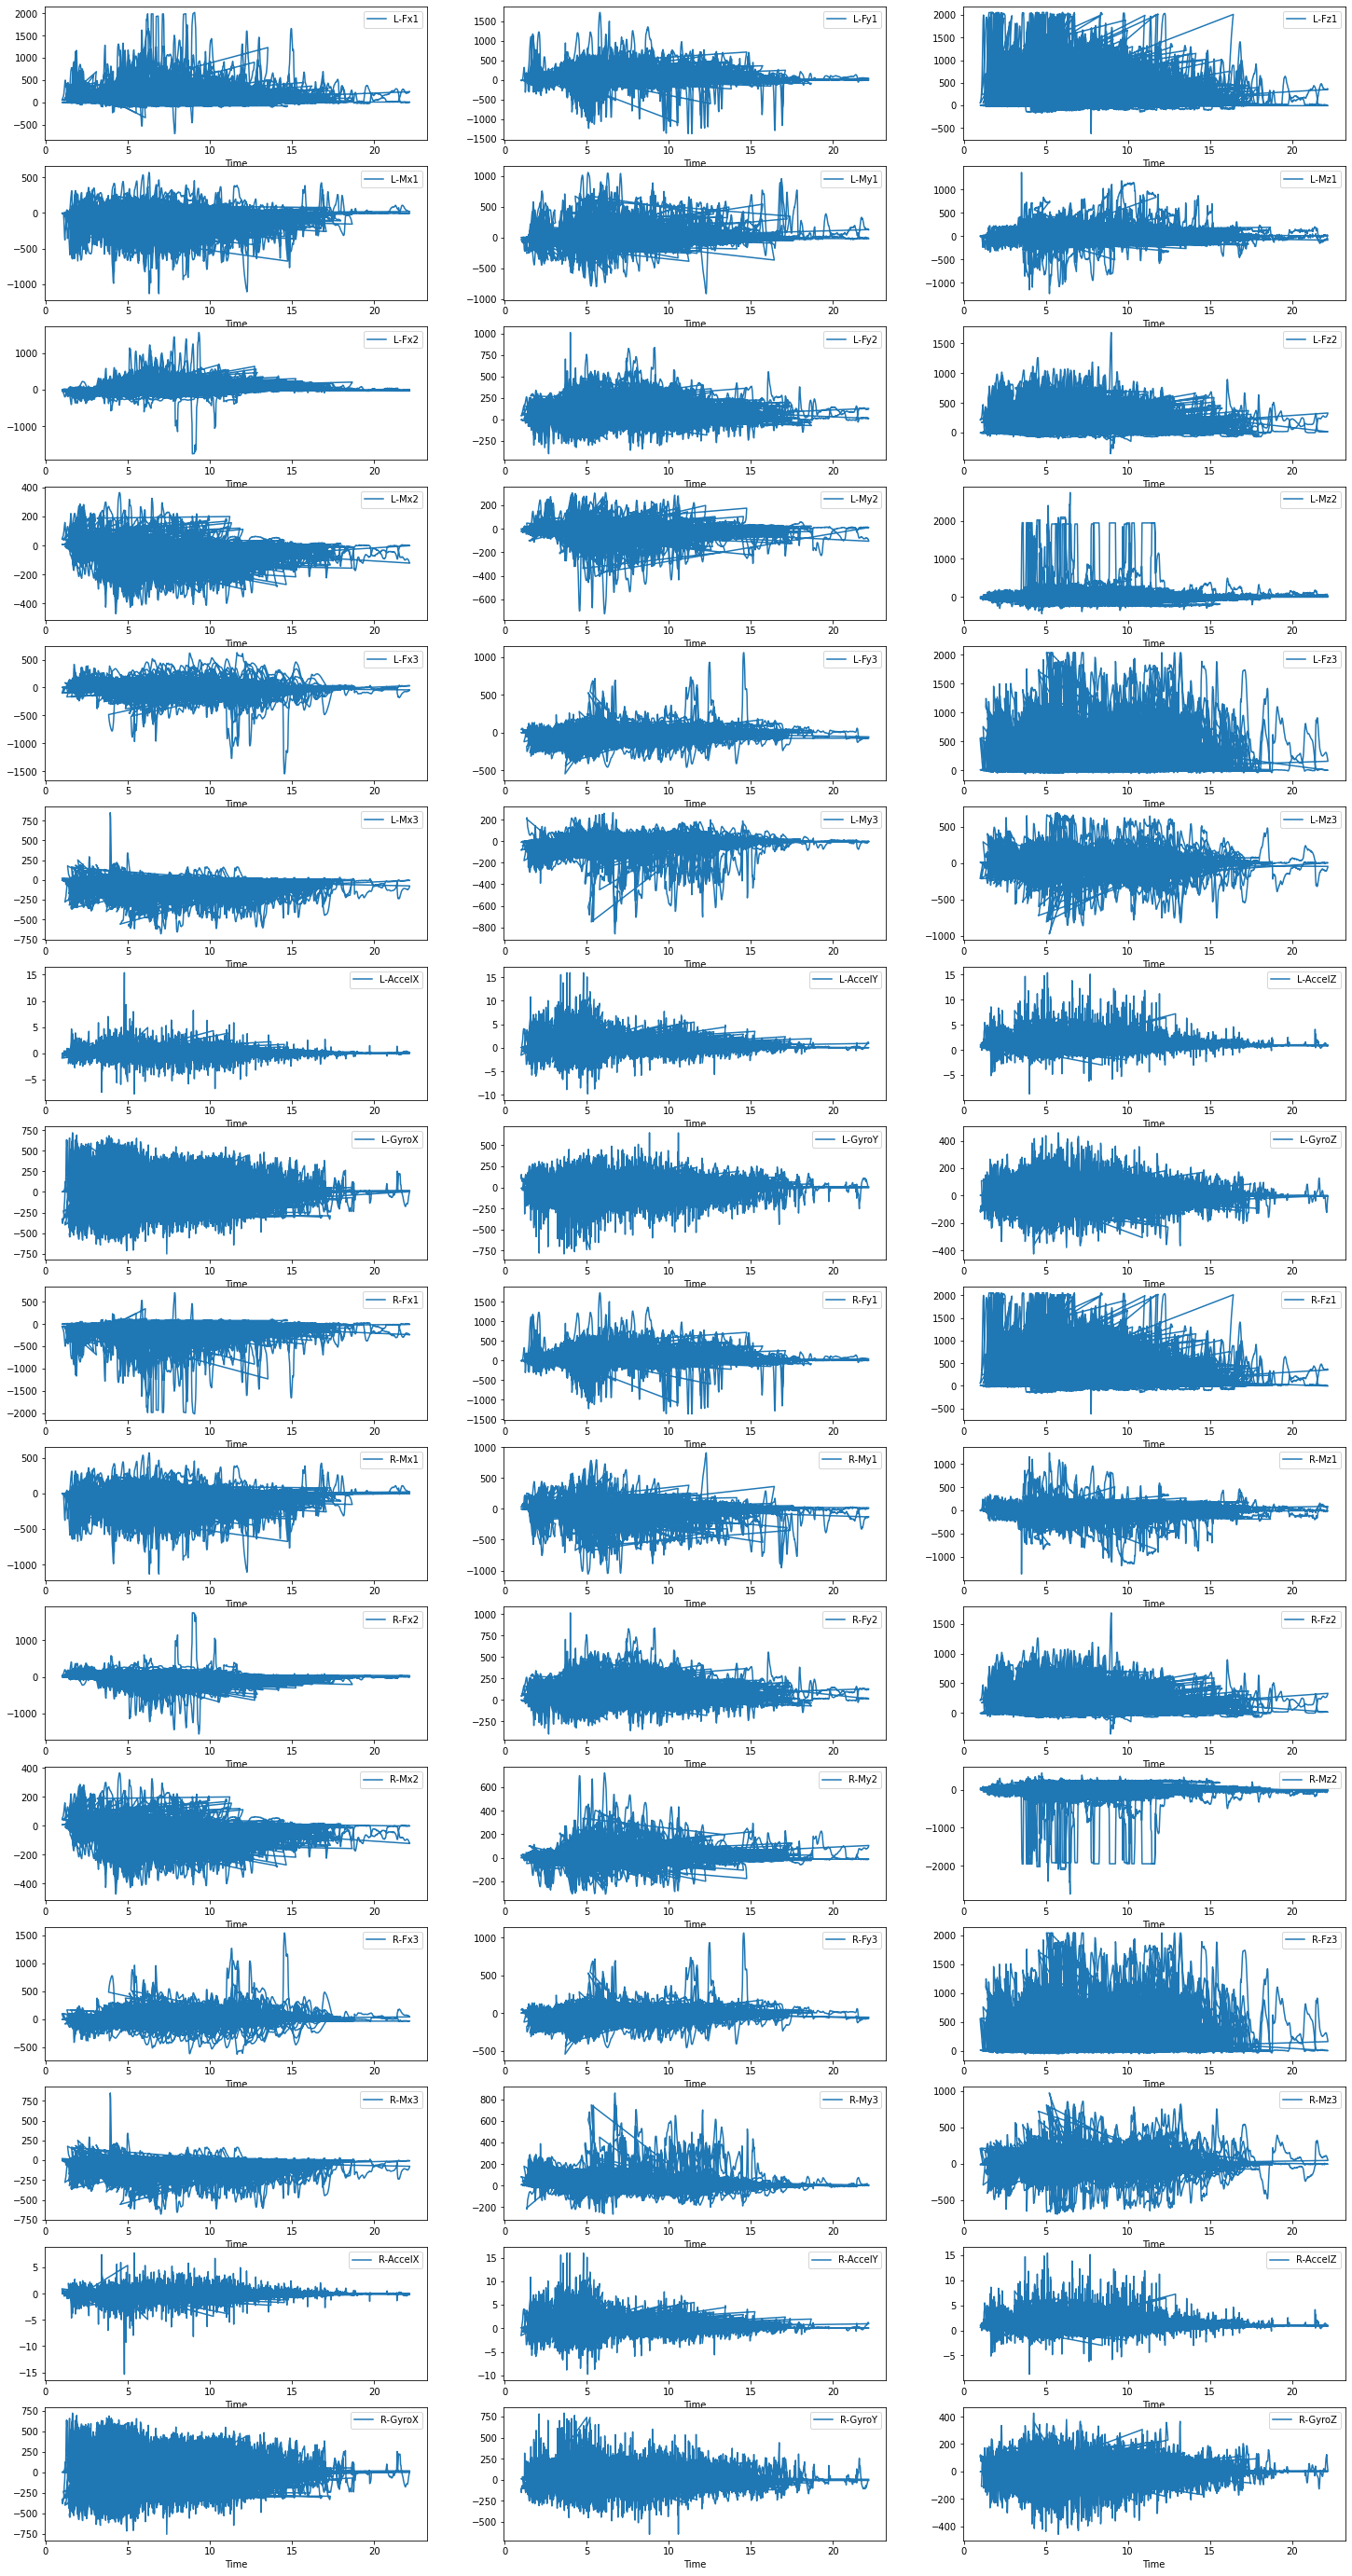

In [17]:
# visualization input 
fig, axes = plt.subplots(nrows=16, ncols=3, figsize=(25, 50))
# L-Fx1
data_Droped.plot(kind="line", x="Time", y="L-Fx1", ax=axes[0,0])
data_Droped.plot(kind="line", x="Time", y="L-Fy1", ax=axes[0,1])
data_Droped.plot(kind="line", x="Time", y="L-Fz1", ax=axes[0,2])

# L-Mx1
data_Droped.plot(kind="line", x="Time", y="L-Mx1", ax=axes[1,0])
data_Droped.plot(kind="line", x="Time", y="L-My1", ax=axes[1,1])
data_Droped.plot(kind="line", x="Time", y="L-Mz1", ax=axes[1,2])

# L-Fx2
data_Droped.plot(kind="line", x="Time", y="L-Fx2", ax=axes[2,0])
data_Droped.plot(kind="line", x="Time", y="L-Fy2", ax=axes[2,1])
data_Droped.plot(kind="line", x="Time", y="L-Fz2", ax=axes[2,2])

# L-Mx2
data_Droped.plot(kind="line", x="Time", y="L-Mx2", ax=axes[3,0])
data_Droped.plot(kind="line", x="Time", y="L-My2", ax=axes[3,1])
data_Droped.plot(kind="line", x="Time", y="L-Mz2", ax=axes[3,2])

# L-Fx3
data_Droped.plot(kind="line", x="Time", y="L-Fx3", ax=axes[4,0])
data_Droped.plot(kind="line", x="Time", y="L-Fy3", ax=axes[4,1])
data_Droped.plot(kind="line", x="Time", y="L-Fz3", ax=axes[4,2])

# L-Mx3
data_Droped.plot(kind="line", x="Time", y="L-Mx3", ax=axes[5,0])
data_Droped.plot(kind="line", x="Time", y="L-My3", ax=axes[5,1])
data_Droped.plot(kind="line", x="Time", y="L-Mz3", ax=axes[5,2])

# L-Accel [X, Y, Z]
data_Droped.plot(kind="line", x="Time", y="L-AccelX", ax=axes[6,0])
data_Droped.plot(kind="line", x="Time", y="L-AccelY", ax=axes[6,1])
data_Droped.plot(kind="line", x="Time", y="L-AccelZ", ax=axes[6,2])

# L-Gyro [X, Y, Z]
data_Droped.plot(kind="line", x="Time", y="L-GyroX", ax=axes[7,0])
data_Droped.plot(kind="line", x="Time", y="L-GyroY", ax=axes[7,1])
data_Droped.plot(kind="line", x="Time", y="L-GyroZ", ax=axes[7,2])

# R-Fx1
data_Droped.plot(kind="line", x="Time", y="R-Fx1", ax=axes[8,0])
data_Droped.plot(kind="line", x="Time", y="R-Fy1", ax=axes[8,1])
data_Droped.plot(kind="line", x="Time", y="R-Fz1", ax=axes[8,2])

# R-Mx1
data_Droped.plot(kind="line", x="Time", y="R-Mx1", ax=axes[9,0])
data_Droped.plot(kind="line", x="Time", y="R-My1", ax=axes[9,1])
data_Droped.plot(kind="line", x="Time", y="R-Mz1", ax=axes[9,2])

# R-Fx2
data_Droped.plot(kind="line", x="Time", y="R-Fx2", ax=axes[10,0])
data_Droped.plot(kind="line", x="Time", y="R-Fy2", ax=axes[10,1])
data_Droped.plot(kind="line", x="Time", y="R-Fz2", ax=axes[10,2])

# R-Mx2
data_Droped.plot(kind="line", x="Time", y="R-Mx2", ax=axes[11,0])
data_Droped.plot(kind="line", x="Time", y="R-My2", ax=axes[11,1])
data_Droped.plot(kind="line", x="Time", y="R-Mz2", ax=axes[11,2])

# R-Fx3
data_Droped.plot(kind="line", x="Time", y="R-Fx3", ax=axes[12,0])
data_Droped.plot(kind="line", x="Time", y="R-Fy3", ax=axes[12,1])
data_Droped.plot(kind="line", x="Time", y="R-Fz3", ax=axes[12,2])

# R-Mx3
data_Droped.plot(kind="line", x="Time", y="R-Mx3", ax=axes[13,0])
data_Droped.plot(kind="line", x="Time", y="R-My3", ax=axes[13,1])
data_Droped.plot(kind="line", x="Time", y="R-Mz3", ax=axes[13,2])

# R-Accel [X, Y, Z]
data_Droped.plot(kind="line", x="Time", y="R-AccelX", ax=axes[14,0])
data_Droped.plot(kind="line", x="Time", y="R-AccelY", ax=axes[14,1])
data_Droped.plot(kind="line", x="Time", y="R-AccelZ", ax=axes[14,2])

# R-Gyro [X, Y, Z]
data_Droped.plot(kind="line", x="Time", y="R-GyroX", ax=axes[15,0])
data_Droped.plot(kind="line", x="Time", y="R-GyroY", ax=axes[15,1])
data_Droped.plot(kind="line", x="Time", y="R-GyroZ", ax=axes[15,2])


In [38]:
# Some example data to display
import numpy as np
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

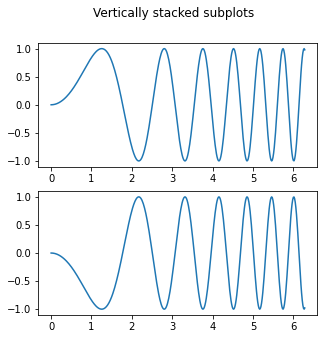

In [39]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)

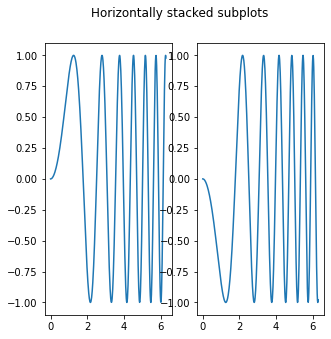

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)